In [1]:
import cv2
import os
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt
plt.ion()



In [2]:
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
PATH = r'E:\4.2\DIP LAB\Project\Dataset\\'

In [4]:
pixel_values = list()
image_names = list()


for file_name in os.listdir(PATH):
    if file_name.split(".")[-1].lower() in {'bmp'}:
        img = cv2.imread(PATH + file_name, 0)
        image_names.append(file_name)
        pixel_values.append( img )

In [5]:
pixel_values[0]

array([[160, 160, 160, ...,   0,   0,   0],
       [160, 105, 105, ...,   0,   0,   0],
       [160, 105, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [6]:
image_names[0]

'10__M_Left_index_finger.BMP'

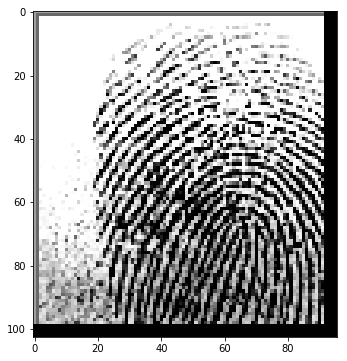

In [7]:
plt.imshow(pixel_values[0], cmap='gray')

### Visualize Histogram

In [8]:
ref_image = pixel_values[0]

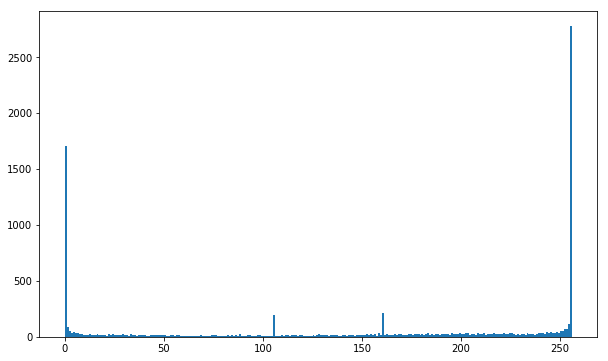

In [9]:
plt.hist(ref_image.ravel(),256,[0,256])
plt.show()

### Histogram Equalization

In [10]:
equalized_image = cv2.equalizeHist(ref_image)

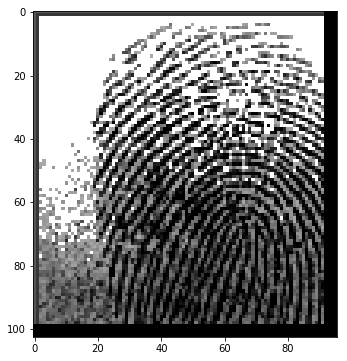

In [11]:
plt.imshow(equalized_image,'gray')

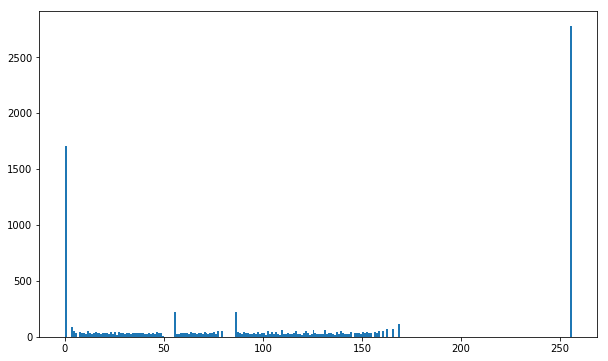

In [12]:
plt.hist(equalized_image.ravel(),256,[0,256])
plt.show()

### Threshold Filtering

In [13]:
def threshold_filter(img):
    
    ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
                cv2.THRESH_BINARY,11,2)
    th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                cv2.THRESH_BINARY,11,2)

    titles = ['Original Image', 'Global Thresholding (v = 127)',
                'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
    images = [img, th1, th2, th3]
    
    
    for i in range(4):
        plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    plt.show()
    

### Smoothing

In [14]:
def smoothing_filter(image, kernel = 'gaussian', kernel_shape = (5,5), kernel_size = 5):
    
    if kernel == 'avg':
        return cv2.blur(image, kernel_shape)
    elif kernel == 'gaussian':
        return cv2.GaussianBlur(image, (5,5), 0)
    elif kernel == 'median':
        return cv2.medianBlur(image, kernel_size)
    else:
        raise ValueError('Kernel attribute error')
        
        

In [15]:
ref_image = pixel_values[0]

In [16]:
ref_image = smoothing_filter(ref_image , kernel='gaussian')

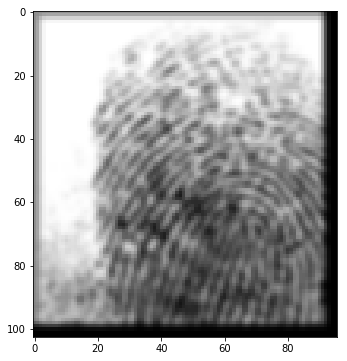

In [17]:
plt.imshow(ref_image, 'gray')

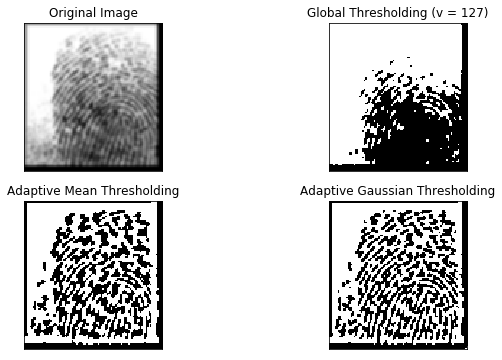

In [18]:
threshold_filter(ref_image)

### Converting to Binary Image

In [19]:
ref_image = pixel_values[0]
(thresh, ref_image_bw) = cv2.threshold(ref_image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

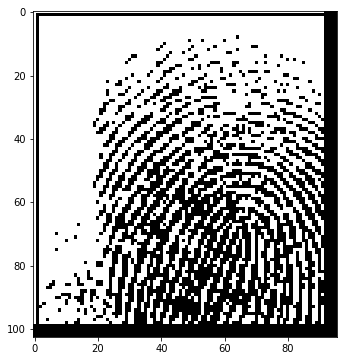

In [20]:
plt.imshow(ref_image_bw , 'gray')

In [21]:
ref_image = ref_image_bw


theta = 1./4.*np.pi
sigma = 2.

In [22]:
gabor_kernel = cv2.getGaborKernel((3,3) , sigma = sigma , theta = theta , lambd = 1, gamma = 0, ktype=cv2.CV_32F  )

In [23]:
gabor_kernel

array([[-3.997494e-01,  9.055026e-01,  6.123234e-17],
       [ 9.055026e-01,  6.123234e-17, -9.055026e-01],
       [ 6.123234e-17, -9.055026e-01,  3.997494e-01]], dtype=float32)

In [24]:
filtered_image = cv2.filter2D(ref_image, cv2.CV_8UC1 , gabor_kernel)

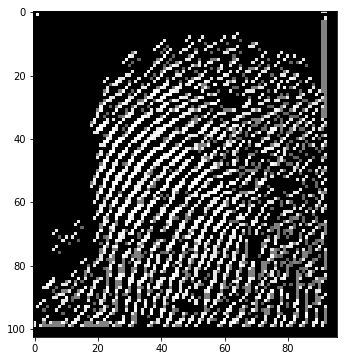

In [25]:
plt.imshow(filtered_image, cmap='gray')

In [26]:
help(cv2.getGaborKernel)

Help on built-in function getGaborKernel:

getGaborKernel(...)
    getGaborKernel(ksize, sigma, theta, lambd, gamma[, psi[, ktype]]) -> retval
    .   @brief Returns Gabor filter coefficients.
    .   
    .   For more details about gabor filter equations and parameters, see: [Gabor
    .   Filter](http://en.wikipedia.org/wiki/Gabor_filter).
    .   
    .   @param ksize Size of the filter returned.
    .   @param sigma Standard deviation of the gaussian envelope.
    .   @param theta Orientation of the normal to the parallel stripes of a Gabor function.
    .   @param lambd Wavelength of the sinusoidal factor.
    .   @param gamma Spatial aspect ratio.
    .   @param psi Phase offset.
    .   @param ktype Type of filter coefficients. It can be CV_32F or CV_64F .

